# API Bağlantısının Yapılması

In [3]:
import pandas as pd
import praw

reddit = praw.Reddit(client_id ='ZHvSvF3zoK1cVWT6ICN24g',
					client_secret ='5vWlo4JrpX-Fc5MTwSJu5EMmTqvpww',
					user_agent ='my user agent',
					username ='',
					password ='')

# to verify whether the instance is authorized instance or not
print(reddit.read_only)
reddit.read_only = True

True


# Reddit'ten Veri Çekmek

In [4]:
import datetime
subreddit = reddit.subreddit('dataisbeautiful')

print(subreddit.display_name)  # Output: iama
print(subreddit.title)         # Output:I Am A, where the mundane...

# for submission in subreddit.hot(limit=50):
#     print(submission.title)  # Output: the submission's title
#     print(submission.score)  # Output: the submission's upvotes
#     print(submission.id)     # Output: the submission's ID
#     print(submission.url)    # Output: the URL

text = []
time = []
num_upvotes = []
num_comments = []
upvote_ratio = []
# link_flair = []
redditor = []
# Türkçe Karalterlerin Düzeltilmesi
duzeltilecek_harfler = "çÇğĞıİöÖşŞüÜ"
duzeltilmis_harfler = "cCgGiIoOsSuU"


alfabe_duzeltme = str.maketrans(duzeltilecek_harfler, duzeltilmis_harfler)

i=1
for submission in subreddit.new(limit=100):
    i+=1
    text.append(submission.title.translate(alfabe_duzeltme).lower())
    time.append(datetime.datetime.fromtimestamp(submission.created_utc))
    num_upvotes.append(submission.score)
    num_comments.append(submission.num_comments)
    upvote_ratio.append(submission.upvote_ratio)
#     link_flair.append(submission.link_flair_text)
    redditor.append(submission.author)
    if i%5 == 0:
        print(f'{i} submissions completed')



dataisbeautiful
DataIsBeautiful
5 submissions completed
10 submissions completed
15 submissions completed
20 submissions completed
25 submissions completed
30 submissions completed
35 submissions completed
40 submissions completed
45 submissions completed
50 submissions completed
55 submissions completed
60 submissions completed
65 submissions completed
70 submissions completed
75 submissions completed
80 submissions completed
85 submissions completed
90 submissions completed
95 submissions completed
100 submissions completed


## DataFrame'e Çevirmek

In [5]:
df = pd.DataFrame(
    {'text': text,
     'time': time,
     'num_comments': num_comments,
     'num_upvotes': num_upvotes,
     'upvote_ratio': upvote_ratio,
#      'link_flair': link_flair,
     'redditor': redditor
    })
df.head(100)


,text,time,num_comments,num_upvotes,upvote_ratio,redditor
0,"my five months on hinge (flow diagram, stats) ...",2021-12-19 21:36:54,1,2,1.00,SaberInTheBathtub
1,"in 2021 i ran the streets of saint paul, mn. a...",2021-12-19 21:31:26,4,15,1.00,Runningmanmn
2,[oc] 2021 in google search trends,2021-12-19 21:09:20,6,27,0.97,joweich
3,2021 yearly inflation (prices increases) acros...,2021-12-19 13:35:28,230,1791,0.91,maps_us_eu
4,male vs. female share of reviews imdb movies [oc],2021-12-19 19:20:45,21,56,0.86,nickkuiper11
...,...,...,...,...,...,...
95,[oc] [updated] countries with the highest inca...,2021-12-14 14:37:26,1367,10205,0.93,LivingCharts
96,the decay of star wars [oc],2021-12-14 10:15:05,35,8,0.57,csheppard925
97,"percent fully vaccinated against covid-19, by ...",2021-12-14 08:00:26,110,658,0.84,pncohen
98,18 of the coolest visualizations for exploring...,2021-12-14 04:51:05,1,0,0.35,deepspace8


# Subreddit Analizi

#### Kaç farklı hesabın katılım sağladığı

In [6]:
df["redditor"].unique().size

88

#### En çok Upvote Alanlar

In [7]:
df["num_upvotes"].sort_values(ascending=False)[0:5]

24    18645
48    17832
38    14459
72    12370
95    10205
Name: num_upvotes, dtype: int64

In [9]:
df.values[39][0]

'[oc] map animation showing record rainfall across southern california'

#### Post Atılma Sıklığı

In [10]:
df["post_hour"] = df["time"].apply(lambda x: x.strftime("%H"))

In [11]:
df.head()

,text,time,num_comments,num_upvotes,upvote_ratio,redditor,post_hour
0,"my five months on hinge (flow diagram, stats) ...",2021-12-19 21:36:54,1,2,1.00,SaberInTheBathtub,21
1,"in 2021 i ran the streets of saint paul, mn. a...",2021-12-19 21:31:26,4,15,1.00,Runningmanmn,21
2,[oc] 2021 in google search trends,2021-12-19 21:09:20,6,27,0.97,joweich,21
3,2021 yearly inflation (prices increases) acros...,2021-12-19 13:35:28,230,1791,0.91,maps_us_eu,13
4,male vs. female share of reviews imdb movies [oc],2021-12-19 19:20:45,21,56,0.86,nickkuiper11,19


In [12]:
# df["time"].plot.bar(x = "text", y = "post_hour");

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   text          100 non-null    object        
 1   time          100 non-null    datetime64[ns]
 2   num_comments  100 non-null    int64         
 3   num_upvotes   100 non-null    int64         
 4   upvote_ratio  100 non-null    float64       
 5   redditor      100 non-null    object        
 6   post_hour     100 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.6+ KB


c:\users\husey\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


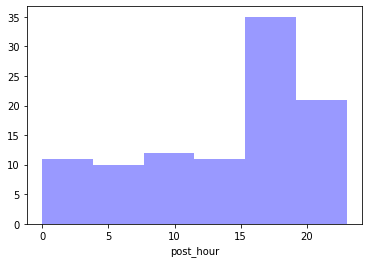

In [13]:
import seaborn as sns
df["post_hour"] = df["time"].apply(lambda x: x.strftime("%H"))
df["post_hour"] = pd.to_numeric(df["post_hour"])
df.info()
sns.distplot(df["post_hour"], kde = False, color ="blue");

#### WordCloud Görselleştirme

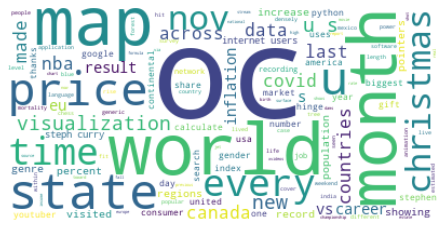

In [14]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path

text = " ".join(i for i in df.text)
text
wordcloud = WordCloud(background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Model Eğitimi

### TextBlob ile Duygu Analizi

In [15]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk

In [19]:
sentence = df.values[45][0]

# Creating a textblob object and assigning the sentiment property
analysis = TextBlob(sentence).sentiment
print(analysis)


blob_object = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
# Running sentiment analysis
analysis = blob_object.sentiment
print(analysis)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(classification='pos', p_pos=0.7230759900491676, p_neg=0.27692400995083266)


In [17]:
import datetime
subreddit = reddit.subreddit('dataisbeautiful')

print(subreddit.display_name)  # Output: iama
print(subreddit.title)         # Output:I Am A, where the mundane...

# for submission in subreddit.hot(limit=50):
#     print(submission.title)  # Output: the submission's title
#     print(submission.score)  # Output: the submission's upvotes
#     print(submission.id)     # Output: the submission's ID
#     print(submission.url)    # Output: the URL

text = []
time = []
num_upvotes = []
num_comments = []
upvote_ratio = []
# link_flair = []
redditor = []
sentiment = []
# Türkçe Karalterlerin Düzeltilmesi
duzeltilecek_harfler = "çÇğĞıİöÖşŞüÜ"
duzeltilmis_harfler = "cCgGiIoOsSuU"


alfabe_duzeltme = str.maketrans(duzeltilecek_harfler, duzeltilmis_harfler)

i=1
for submission in subreddit.new(limit=50):
    i+=1
    text.append(submission.title.translate(alfabe_duzeltme).lower())
    time.append(datetime.datetime.fromtimestamp(submission.created_utc))
    num_upvotes.append(submission.score)
    num_comments.append(submission.num_comments)
    upvote_ratio.append(submission.upvote_ratio)
#     link_flair.append(submission.link_flair_text)
    redditor.append(submission.author)
    sentence = submission.title.translate(alfabe_duzeltme).lower()
    blob_object = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    # Running sentiment analysis
    analysis = blob_object.sentiment
    sentiment.append(analysis.classification)
    if i%5 == 0:
        print(f'{i} submissions completed')

df = pd.DataFrame(
    {'text': text,
     'time': time,
     'num_comments': num_comments,
     'num_upvotes': num_upvotes,
     'upvote_ratio': upvote_ratio,
#      'link_flair': link_flair,
     'redditor': redditor,
     'sentiment': sentiment
    })
df.head(50)

dataisbeautiful
DataIsBeautiful
5 submissions completed
10 submissions completed
15 submissions completed
20 submissions completed
25 submissions completed
30 submissions completed
35 submissions completed
40 submissions completed
45 submissions completed
50 submissions completed


,text,time,num_comments,num_upvotes,upvote_ratio,redditor,sentiment
0,"my five months on hinge (flow diagram, stats) ...",2021-12-19 21:36:54,4,2,1.00,SaberInTheBathtub,pos
1,"in 2021 i ran the streets of saint paul, mn. a...",2021-12-19 21:31:26,6,27,0.97,Runningmanmn,neg
2,[oc] 2021 in google search trends,2021-12-19 21:09:20,6,30,0.97,joweich,pos
3,2021 yearly inflation (prices increases) acros...,2021-12-19 13:35:28,230,1820,0.91,maps_us_eu,pos
4,male vs. female share of reviews imdb movies [oc],2021-12-19 19:20:45,21,57,0.87,nickkuiper11,neg
5,[oc] the electrical grid of the continental u....,2021-12-19 18:38:19,55,618,0.97,ptgorman,neg
6,[oc] differences in rates of r/amitheasshole j...,2021-12-19 17:29:50,4,0,0.42,jarrjam,pos
7,[oc] disappearing white christmas (1950-2020),2021-12-19 17:28:30,233,3581,0.97,a__square__peg,neg
8,unicorn startups data analysis and visualizati...,2021-12-19 11:38:18,0,1,0.67,call_me_ninza,neg
9,countries that have been to space,2021-12-19 10:08:28,8,5,0.59,radinsarraf,pos


In [18]:
df = pd.DataFrame(
    {'text': text,
     'time': time,
     'num_comments': num_comments,
     'num_upvotes': num_upvotes,
     'upvote_ratio': upvote_ratio,
#      'link_flair': link_flair,
     'redditor': redditor,
     'sentiment': sentiment
    })
df.head(50)

,text,time,num_comments,num_upvotes,upvote_ratio,redditor,sentiment
0,"my five months on hinge (flow diagram, stats) ...",2021-12-19 21:36:54,4,2,1.00,SaberInTheBathtub,pos
1,"in 2021 i ran the streets of saint paul, mn. a...",2021-12-19 21:31:26,6,27,0.97,Runningmanmn,neg
2,[oc] 2021 in google search trends,2021-12-19 21:09:20,6,30,0.97,joweich,pos
3,2021 yearly inflation (prices increases) acros...,2021-12-19 13:35:28,230,1820,0.91,maps_us_eu,pos
4,male vs. female share of reviews imdb movies [oc],2021-12-19 19:20:45,21,57,0.87,nickkuiper11,neg
5,[oc] the electrical grid of the continental u....,2021-12-19 18:38:19,55,618,0.97,ptgorman,neg
6,[oc] differences in rates of r/amitheasshole j...,2021-12-19 17:29:50,4,0,0.42,jarrjam,pos
7,[oc] disappearing white christmas (1950-2020),2021-12-19 17:28:30,233,3581,0.97,a__square__peg,neg
8,unicorn startups data analysis and visualizati...,2021-12-19 11:38:18,0,1,0.67,call_me_ninza,neg
9,countries that have been to space,2021-12-19 10:08:28,8,5,0.59,radinsarraf,pos


# Model Eğitimi - Tensorflow

In [1]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd 
data = pd.read_csv("Reddit_Data.csv")

In [3]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
data["category"].replace(-1, value = "negatif", inplace = True)
data["category"].replace(1, value = "pozitif", inplace = True)
data["category"].replace(0, value = "notr", inplace = True)

In [5]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,pozitif
1,buddhism has very much lot compatible with chr...,pozitif
2,seriously don say thing first all they won get...,negatif
3,what you have learned yours and only yours wha...,notr
4,for your own benefit you may want read living ...,pozitif


In [6]:
# data = data[(data.category == "negatif") | (data.category == "pozitif")]

In [7]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,pozitif
1,buddhism has very much lot compatible with chr...,pozitif
2,seriously don say thing first all they won get...,negatif
3,what you have learned yours and only yours wha...,notr
4,for your own benefit you may want read living ...,pozitif


In [8]:
data.groupby("category").count()

,clean_comment
category,
negatif,8277
notr,13042
pozitif,15830


In [9]:
df = pd.DataFrame()
df["text"] = data["clean_comment"]
df["label"] = data["category"]

In [10]:
df.head()

,text,label
0,family mormon have never tried explain them t...,pozitif
1,buddhism has very much lot compatible with chr...,pozitif
2,seriously don say thing first all they won get...,negatif
3,what you have learned yours and only yours wha...,notr
4,for your own benefit you may want read living ...,pozitif


## Metin Ön İşleme

In [11]:
#buyuk-kucuk donusumu
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#noktalama işaretleri
df['text'] = df['text'].str.replace('[^\w\s]','')
#sayılar
df['text'] = df['text'].str.replace('\d','')
#stopwords
import nltk
# nltk.download('wordnet')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
#seyreklerin silinmesi
sil = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))
#lemmi
from textblob import Word
#nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

AttributeError: 'float' object has no attribute 'split'

## Değişken Mühendisliği

* Count Vectors
* TF-IDF Vectors (words, characters, n-grams)
* Word Embeddings

TF(t) = (Bir t teriminin bir dökümanda gözlenme frekansı) / (dökümandaki toplam terim sayısı) 

IDF(t) = log_e(Toplam döküman sayısı / içinde t terimi olan belge sayısı)


In [12]:
df.head()

,text,label
0,family mormon have never tried explain them t...,pozitif
1,buddhism has very much lot compatible with chr...,pozitif
2,seriously don say thing first all they won get...,negatif
3,what you have learned yours and only yours wha...,notr
4,for your own benefit you may want read living ...,pozitif


In [13]:
df.iloc[0]

text      family mormon have never tried explain them t...
label                                              pozitif
Name: 0, dtype: object

## Test-Train

In [14]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df["text"],
                                                                   df["label"], 
                                                                    random_state = 1)

In [15]:
train_y[0:5]

28884       notr
19390    pozitif
31239       notr
23373    pozitif
35847       notr
Name: label, dtype: object

In [16]:
encoder = preprocessing.LabelEncoder()

In [17]:
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [18]:
train_y[0:5]

array([1, 2, 1, 2, 1])

In [19]:
test_y[0:5]

array([0, 0, 0, 2, 2])

### Count Vectors

In [20]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x.astype('U').values)

CountVectorizer()

In [21]:
x_train_count = vectorizer.transform(train_x.astype('U').values)
x_test_count = vectorizer.transform(test_x.astype('U').values)

In [22]:
vectorizer.get_feature_names()[0:5]

['000', '0001', '000rs', '001', '001445wd']

In [23]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### TF-IDF

In [24]:
#wordlevel

In [25]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x.astype('U').values)

TfidfVectorizer()

In [26]:
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x.astype('U').values)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x.astype('U').values)

In [27]:
tf_idf_word_vectorizer.get_feature_names()[0:5]

['000', '0001', '000rs', '001', '001445wd']

In [28]:
x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
# ngram level tf-idf

In [30]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (2,3))
tf_idf_ngram_vectorizer.fit(train_x.astype('U').values)

TfidfVectorizer(ngram_range=(2, 3))

In [31]:
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(train_x.astype('U').values)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(test_x.astype('U').values)

In [32]:
# characters level tf-idf

In [33]:
tf_idf_chars_vectorizer = TfidfVectorizer(analyzer = "char", ngram_range = (2,3))
tf_idf_chars_vectorizer.fit(train_x.astype('U').values)

TfidfVectorizer(analyzer='char', ngram_range=(2, 3))

In [34]:
x_train_tf_idf_chars = tf_idf_chars_vectorizer.transform(train_x.astype('U').values)
x_test_tf_idf_chars = tf_idf_chars_vectorizer.transform(test_x.astype('U').values)

# Makine Öğrenmesi ile Sentiment Sınıflandırması

## Lojistik Regresyon

In [59]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.8256191136947212


In [36]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.7747222516745573


In [37]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.575217242984838


In [38]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.7194216380927794


## Naive Bayes

In [66]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.5414988267726336


In [54]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.4989798223332703


In [55]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.45334577246303986


In [56]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.4760033514196282


## Random Forests

In [112]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.7400402446951222


In [103]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.7333808540357639


In [104]:
rf = ensemble.RandomForestClassifier()
rf_model = loj.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.575217242984838


In [105]:
rf = ensemble.RandomForestClassifier()
rf_model = loj.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.7194216380927794


## XGBoost

In [136]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

[01:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:37:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:37:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [107]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

[23:12:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [108]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

[23:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [109]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

[23:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [60]:
loj_model

LogisticRegression()

In [144]:
# yeni_yorum = pd.Series("this film is very nice and good i like it")

yeni_yorum = pd.Series("no not good look at that shit very bad fuck")

# yeni_yorum = pd.Series("what you have learned yours and only yours")

In [145]:
v = CountVectorizer()
v.fit(train_x.astype('U').values)
yeni_yorum = v.transform(yeni_yorum)

In [132]:
loj_model.predict(yeni_yorum)

ValueError: X has 45592 features, but LogisticRegression is expecting 30044 features as input.

In [100]:
nb_model

MultinomialNB()

In [101]:
nb_model.predict(yeni_yorum)

array([2])

In [110]:
rf_model

LogisticRegression()

In [133]:
rf_model.predict(yeni_yorum)

array([1])

In [146]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [143]:
xgb_model.predict(yeni_yorum)

array([2])